In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [30]:
heart_disease_data = pd.read_csv("C:/Users/shrey/OneDrive/Documents/heart.csv")
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
heart_disease_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [32]:
heart_disease_data.value_counts('target')

target
1    165
0    138
Name: count, dtype: int64

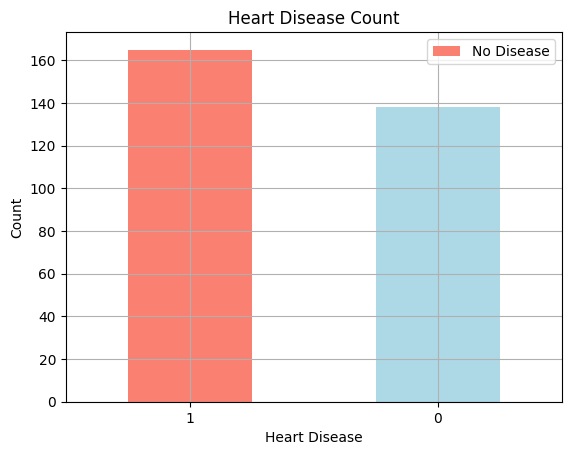

In [33]:
heart_disease_data['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'])
plt.xticks(rotation=0)
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.title('Heart Disease Count')
plt.legend(['No Disease', 'Disease'])
plt.grid(True)
plt.show()

In [34]:
x = heart_disease_data.drop(columns='target', axis=1)
y = heart_disease_data['target']

In [35]:
std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x)


In [36]:
x = x_scaled
y = y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [38]:
train_predictions = model.predict(x_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy:.2f}")

Training Accuracy: 0.86


In [39]:
test_predictions = model.predict(x_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.85


In [40]:
input_data = np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
input_data_scaled = std_scaler.transform(input_data)
prediction = model.predict(input_data_scaled)
if prediction[0] == 1:
    print("The person has heart disease.")
else:
    print("The person does not have heart disease.")

The person has heart disease.


c:\Users\shrey\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
import pickle
filename = 'Heart_model.pkl'
pickle.dump(model, open(filename, 'wb'))